# Week 2

As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2023/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

**New Info**: Remember that this week is also the time to learn a bit about how the the assignments and the final project work. So if you havn't already, check out the [Before week 2: Assignments and Final Project](https://github.com/suneman/socialdata2023/blob/main/lectures/Assignments_And_Final_Project.ipynb) notebook.

### LLM update
Since we're doing our LLM experiment, I've added a lot of comments about how to use (and not to use) the LLMs. <font color="grey">I've put all of those comments in a special grey color - **like the one I'm using here** -  so you can easily spot them</font>.

## Overview

Today's lecture does a few things.
* First there is an introduction to data visualization incl a little exercise and a video (Part 1). 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots (Part 2,4,5).
* We will also talk a bit about what makes a good plot (Part 3).

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. <font color='grey'>If you don't know how to do that, you may ask your favorite LLM to explain how they work.</font> You can also go "the old way" and use _stackoverflow_. And by the way, never search stack overflow: search Google and choose the relevant stackoverflow topic.

Now, to the exercise:

> *Exercise*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. <font color='grey'>You may also ask an LLM, but make sure it doesn't just give you the answer: Ask how string formatting works, get some examples, and solve your own problem based on that.</font>
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. <font color='grey'>You should be able to do this without any help from LLMs.</font> Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> a, b, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/anscombe.png).) <font color='grey'>For this sub-exercise, try to write the code based on the example I link to. If you get stuck, you may use your LLM to figure it out. But don't ask it for the solution, ask for help with figuring out how to use the functions!</font>
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this). <font color='grey'>Again, try to write down your own thoughts first. Then you can ask your LLM for help after that</font>.
> * <font color='grey'>What did you get out of asking the LLM about the previous sub-question? How did you even go about asking the LLM about the point of the entire set of questions? Reflect on whether or not the LLM helped you get smarter?</font>


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!! <font color='grey'>After reading the wikipedia page, can you learn something from a LLM that's not in the wikipedia page?</font>

In [1]:
# Using the numpy function mean, calculate the mean of both 𝑥-values and  𝑦-values for each dataset.
# Use python string formatting to print precisely two decimal places of these results to the output cell. 
import numpy as np
import pandas as pd

data1 = pd.read_csv('data1.tsv', sep='\t', header=None)
data2 = pd.read_csv('data2.tsv', sep='\t', header=None)
data3 = pd.read_csv('data3.tsv', sep='\t', header=None)
data4 = pd.read_csv('data4.tsv', sep='\t', header=None)

data_list = [data1, data2, data3, data4]

for item in data_list:
    mean_x = item.iloc[:, 0].mean()
    mean_y = item.iloc[:, 1].mean()
    
    x_mean = np.mean(item,axis = 0)
    y_mean = np.mean(item,axis = 1)
    print(f"X mean {mean_x:.3f}")
    print(f"Y mean {mean_y:.3f}")

X mean 9.000
Y mean 7.501
X mean 9.000
Y mean 7.501
X mean 9.000
Y mean 7.500
X mean 9.000
Y mean 7.501


In [2]:
# Now calculate the variance for all of the various sets of  𝑥- and  𝑦-values, by using the numpy function var.
# Print it to three decimal places.
for item in data_list:
    var1 = np.var(item, axis=0)
    print(f"Variance: {var1[0]:.3f}")
    print(f"Variance: {var1[1]:.3f}")

Variance: 10.000
Variance: 3.752
Variance: 10.000
Variance: 3.752
Variance: 10.000
Variance: 3.748
Variance: 10.000
Variance: 3.748


In [3]:
# Use numpy to calculate the Pearson correlation between  𝑥- and  𝑦 -values for all four data sets (also print to three decimal places).

for item in data_list:
    xx = np.corrcoef(item.iloc[:,0], item.iloc[:, 1])
    print(f"value: {xx[0][1]:.3f}")

value: 0.816
value: 0.816
value: 0.816
value: 0.817


In [4]:
# The next step is use linear regression to fit a straight line  𝑓(𝑥)=𝑎𝑥+𝑏 through each dataset and report  𝑎 and  𝑏
# 3  (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress. 
# It works like this: 

from scipy import stats
#a, b, r_value, p_value, std_err = stats.linregress(x,y)

for item in data_list:
    a, b, r_value, p_value, std_err = stats.linregress(item.iloc[:,0], item.iloc[:,1])
    print(f"a val: {a:.3f}, b val: {b:.3f}")

a val: 0.500, b val: 3.000
a val: 0.500, b val: 3.001
a val: 0.500, b val: 3.002
a val: 0.500, b val: 3.002


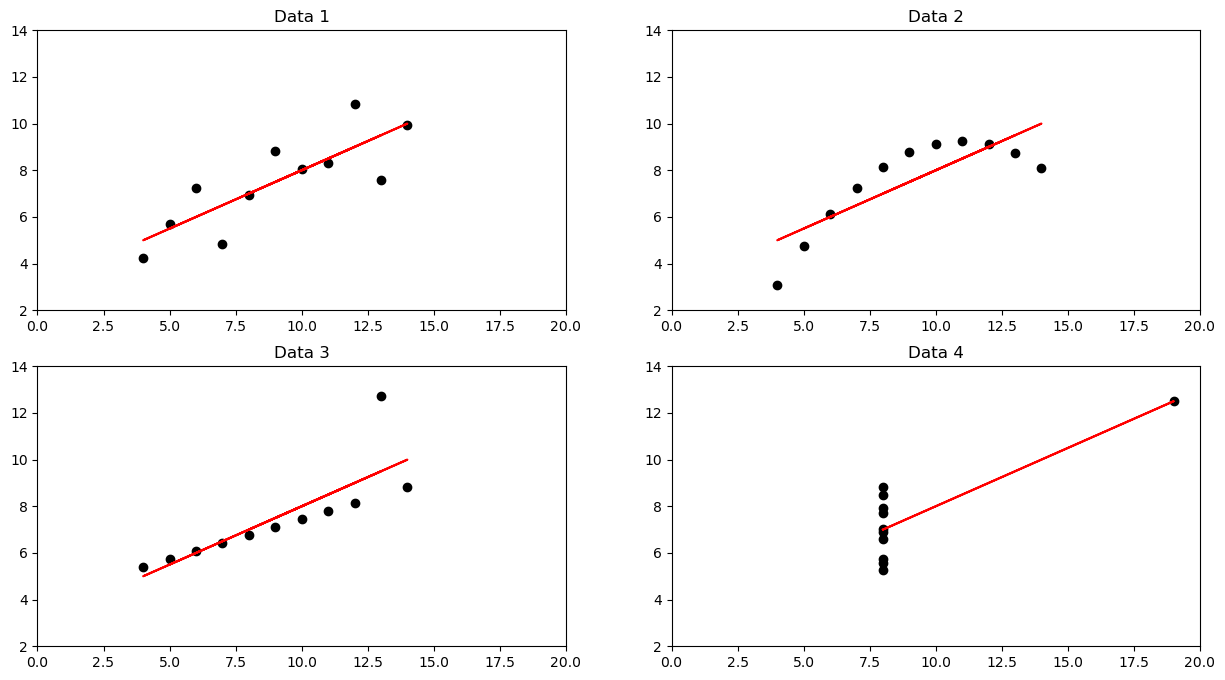

In [5]:
import matplotlib.pyplot as plt
    
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    a, b, r_value, p_value, std_err = stats.linregress(data_list[i].iloc[:,0], data_list[i].iloc[:,1])
    ax.plot(data_list[i].iloc[:,0], data_list[i].iloc[:,0]*a + b, color='red')
    ax.scatter(data_list[i].iloc[:,0], data_list[i].iloc[:,1], color='black')
    
    # Defining custom 'xlim' and 'ylim' values.
    custom_xlim = (0, 20)
    custom_ylim = (2, 14)
    # Setting the values for all axes.
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    
    ax.set_title(f'Data {i+1}')

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/9D2aI30AMhM/0.jpg)](https://www.youtube.com/watch?v=9D2aI30AMhM)

> *Excercise:* Questions for the lecture. <font color='grey'>Answer in your own words based on the video, ***don't use your LLM***.
> Once you've written down your answers, it's OK to use the LLM to get better.</font>
> 
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.
>
> <font color='grey'>It's easy to write a lot with LLMs, but here I want you to keep your answers short and precise. It's not important now, but if I ever ask you to hand in this exercise, I will add a word count. Probably something like 200 words total.</font>

## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [6]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [7]:
path = r"C:\Users\micha\OneDrive\Pulpit\DTU\S4\02806_Social\week1\Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv"
all_data = pd.read_csv(path)

In [8]:
from pandas.api.types import CategoricalDtype

data = all_data[all_data['Category'].isin(focuscrimes)] 
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#print(data.keys())

focusCrime_list = list(focuscrimes) 

# sorting the week days in custom order 
cat_type = CategoricalDtype(categories=cats, ordered=True)
data['DayOfWeek'] = data['DayOfWeek'].astype(cat_type)

# group data by category and week day
grouped_data = data.groupby(['DayOfWeek', 'Category']).size().reset_index(name='crime_count')

C:\Users\micha\AppData\Local\Temp\ipykernel_7204\2035542880.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DayOfWeek'] = data['DayOfWeek'].astype(cat_type)


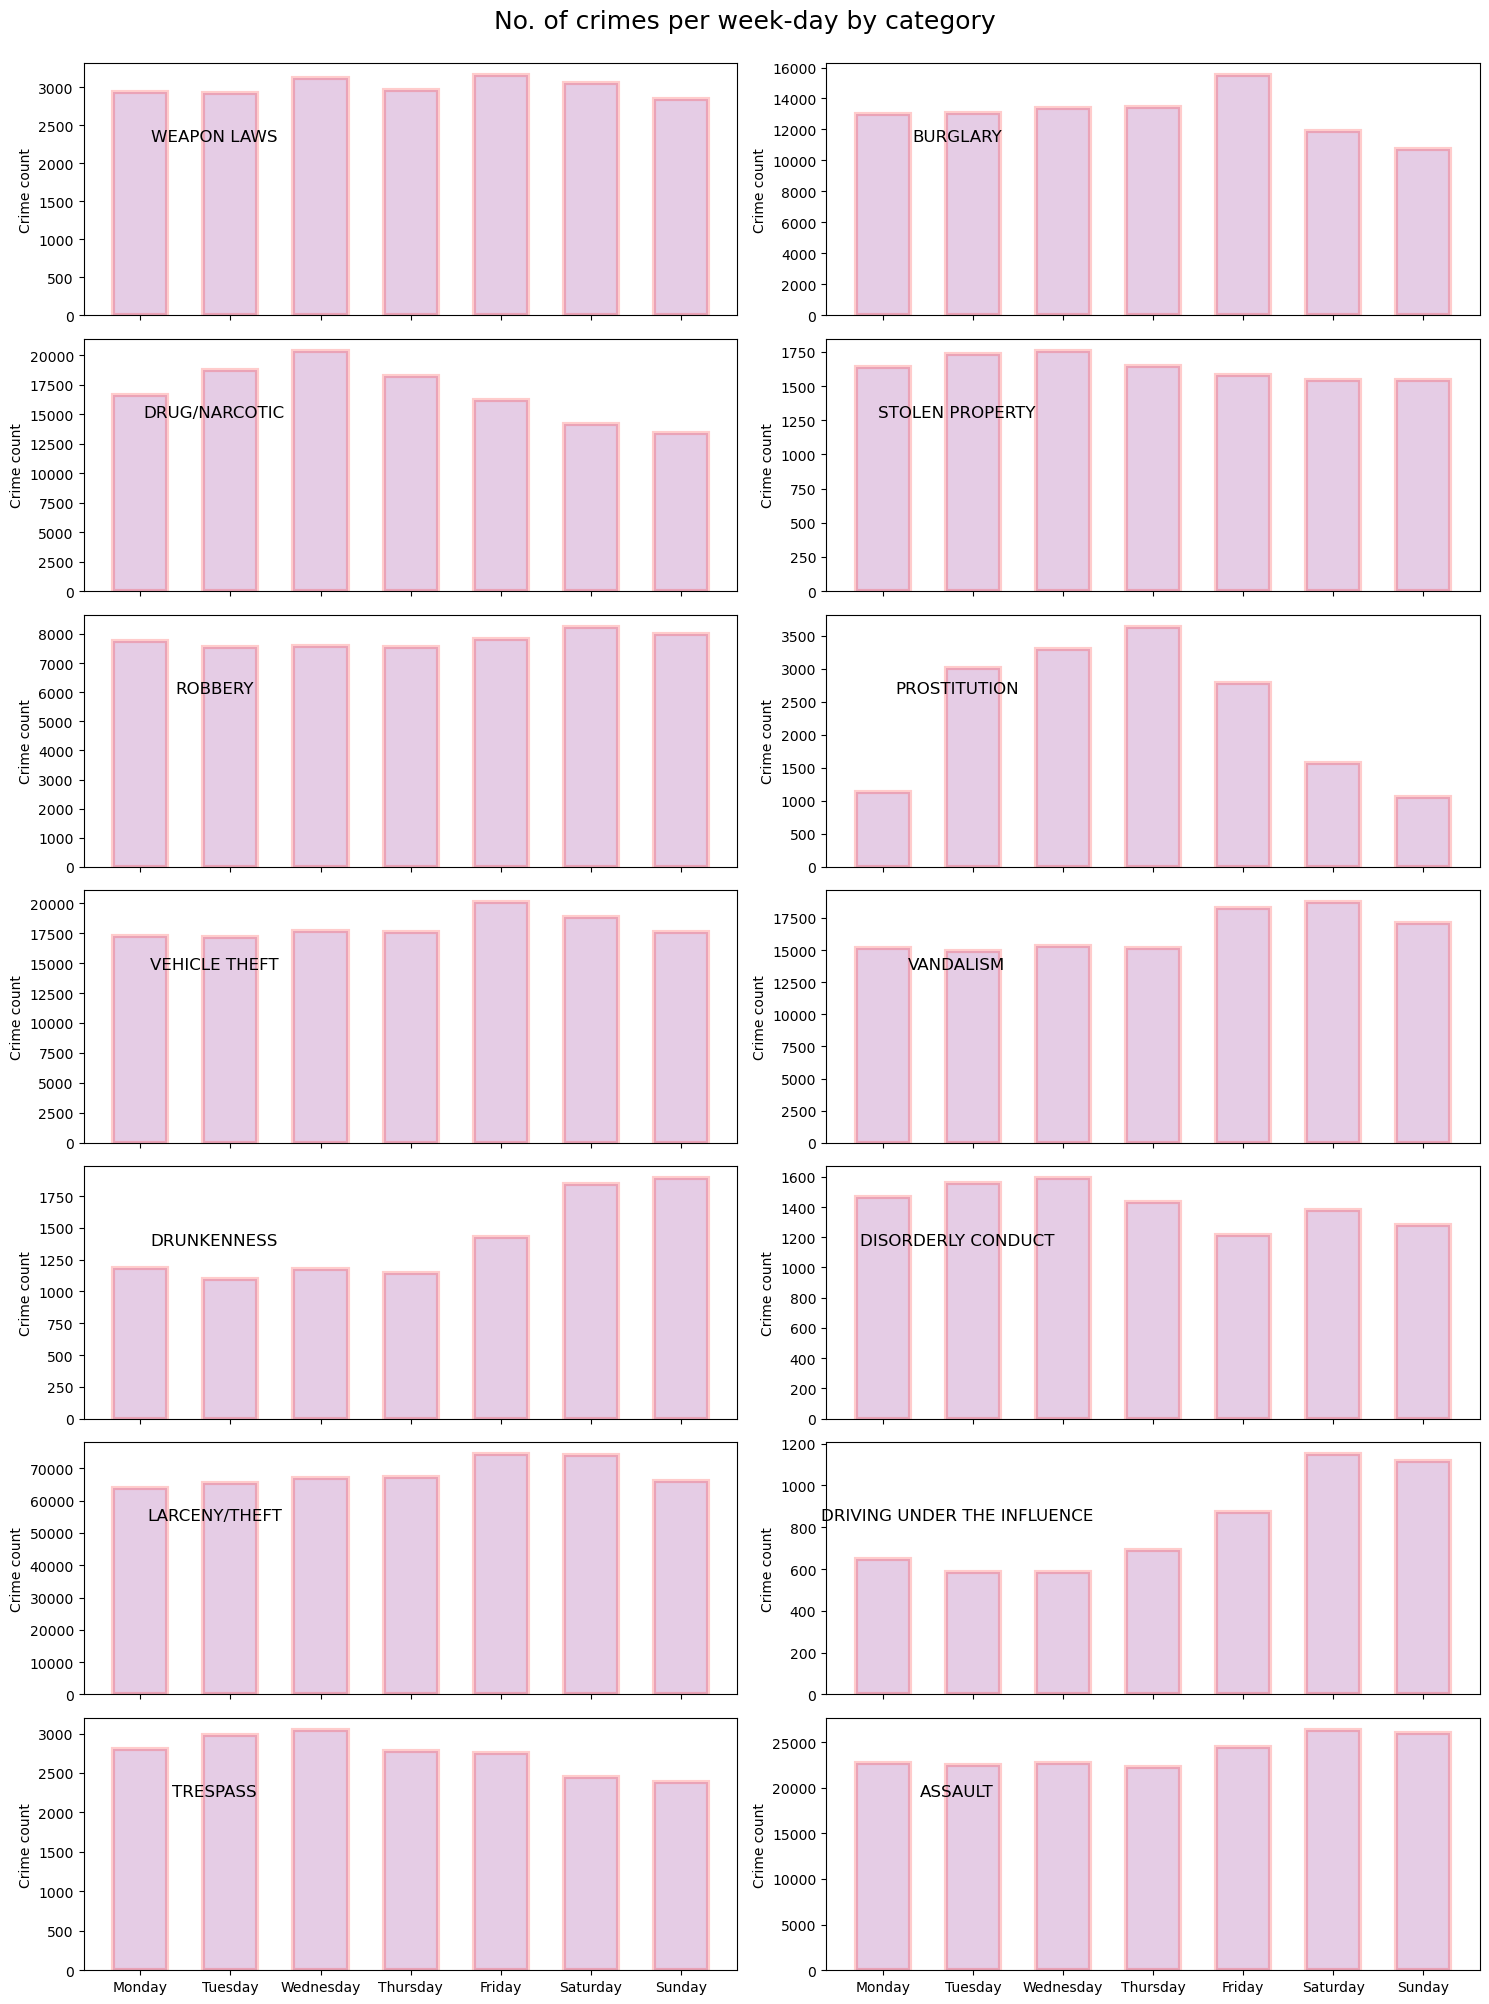

In [9]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), sharex=True)
# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

for i, crime in enumerate(focusCrime_list):
    ax = axes[i]
    crime_data = grouped_data[grouped_data['Category'] == crime]
    ax.bar(crime_data['DayOfWeek'], crime_data['crime_count'], alpha=0.2, color='purple', edgecolor='red', linewidth=3, width=0.6)
    ax.set_title(f'{crime}', y=0.8, x=0.2, pad=-20)
    ax.set_ylabel('Crime count')
fig.suptitle('No. of crimes per week-day by category', size=18, y=1.0)
fig.tight_layout()

In [10]:
# Count by months
import calendar

data = all_data[all_data['Category'].isin(focuscrimes)].copy()
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

# group the data by month and category
grouped_data = data.groupby(['Month']).size().reset_index(name='crime_count')

#print(data.head())

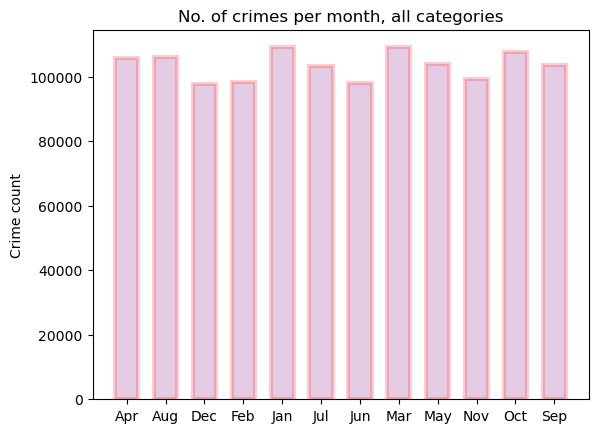

In [11]:
months_short = calendar.month_abbr[1:]

plt.bar(grouped_data['Month'], grouped_data['crime_count'], alpha=0.2, color='purple', edgecolor='red', linewidth=3, width=0.6)
plt.title(f'No. of crimes per month, all categories')
plt.ylabel('Crime count')
fig.tight_layout()

C:\Users\micha\AppData\Local\Temp\ipykernel_7204\666633882.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


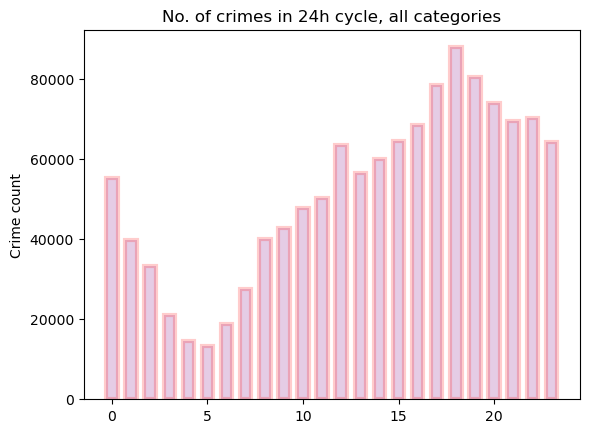

In [12]:
# The 24 hour cycle. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. 
# Again: Give me a couple of comments on what you see.
data = all_data[all_data['Category'].isin(focuscrimes)].copy()
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour

grouped_data = data.groupby(['Hour']).size().reset_index(name='crime_count')

plt.bar(grouped_data['Hour'], grouped_data['crime_count'], alpha=0.2, color='purple', edgecolor='red', linewidth=3, width=0.6)
plt.title(f'No. of crimes in 24h cycle, all categories')
plt.ylabel('Crime count')
fig.tight_layout()

In [13]:
data = all_data[all_data['Category'].isin(focuscrimes)].copy()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# sorting the week days in custom order 
cat_type = CategoricalDtype(categories=cats, ordered=True)
data['DayOfWeek'] = data['DayOfWeek'].astype(cat_type)

data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour

grouped_data = data.groupby(['DayOfWeek', 'Hour', 'Category']).size().reset_index(name='crime_count')
print(grouped_data.head())

C:\Users\micha\AppData\Local\Temp\ipykernel_7204\1358402138.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


  DayOfWeek  Hour                     Category  crime_count
0    Monday     0                      ASSAULT         1130
1    Monday     0                     BURGLARY          514
2    Monday     0           DISORDERLY CONDUCT           64
3    Monday     0  DRIVING UNDER THE INFLUENCE           78
4    Monday     0                DRUG/NARCOTIC          523


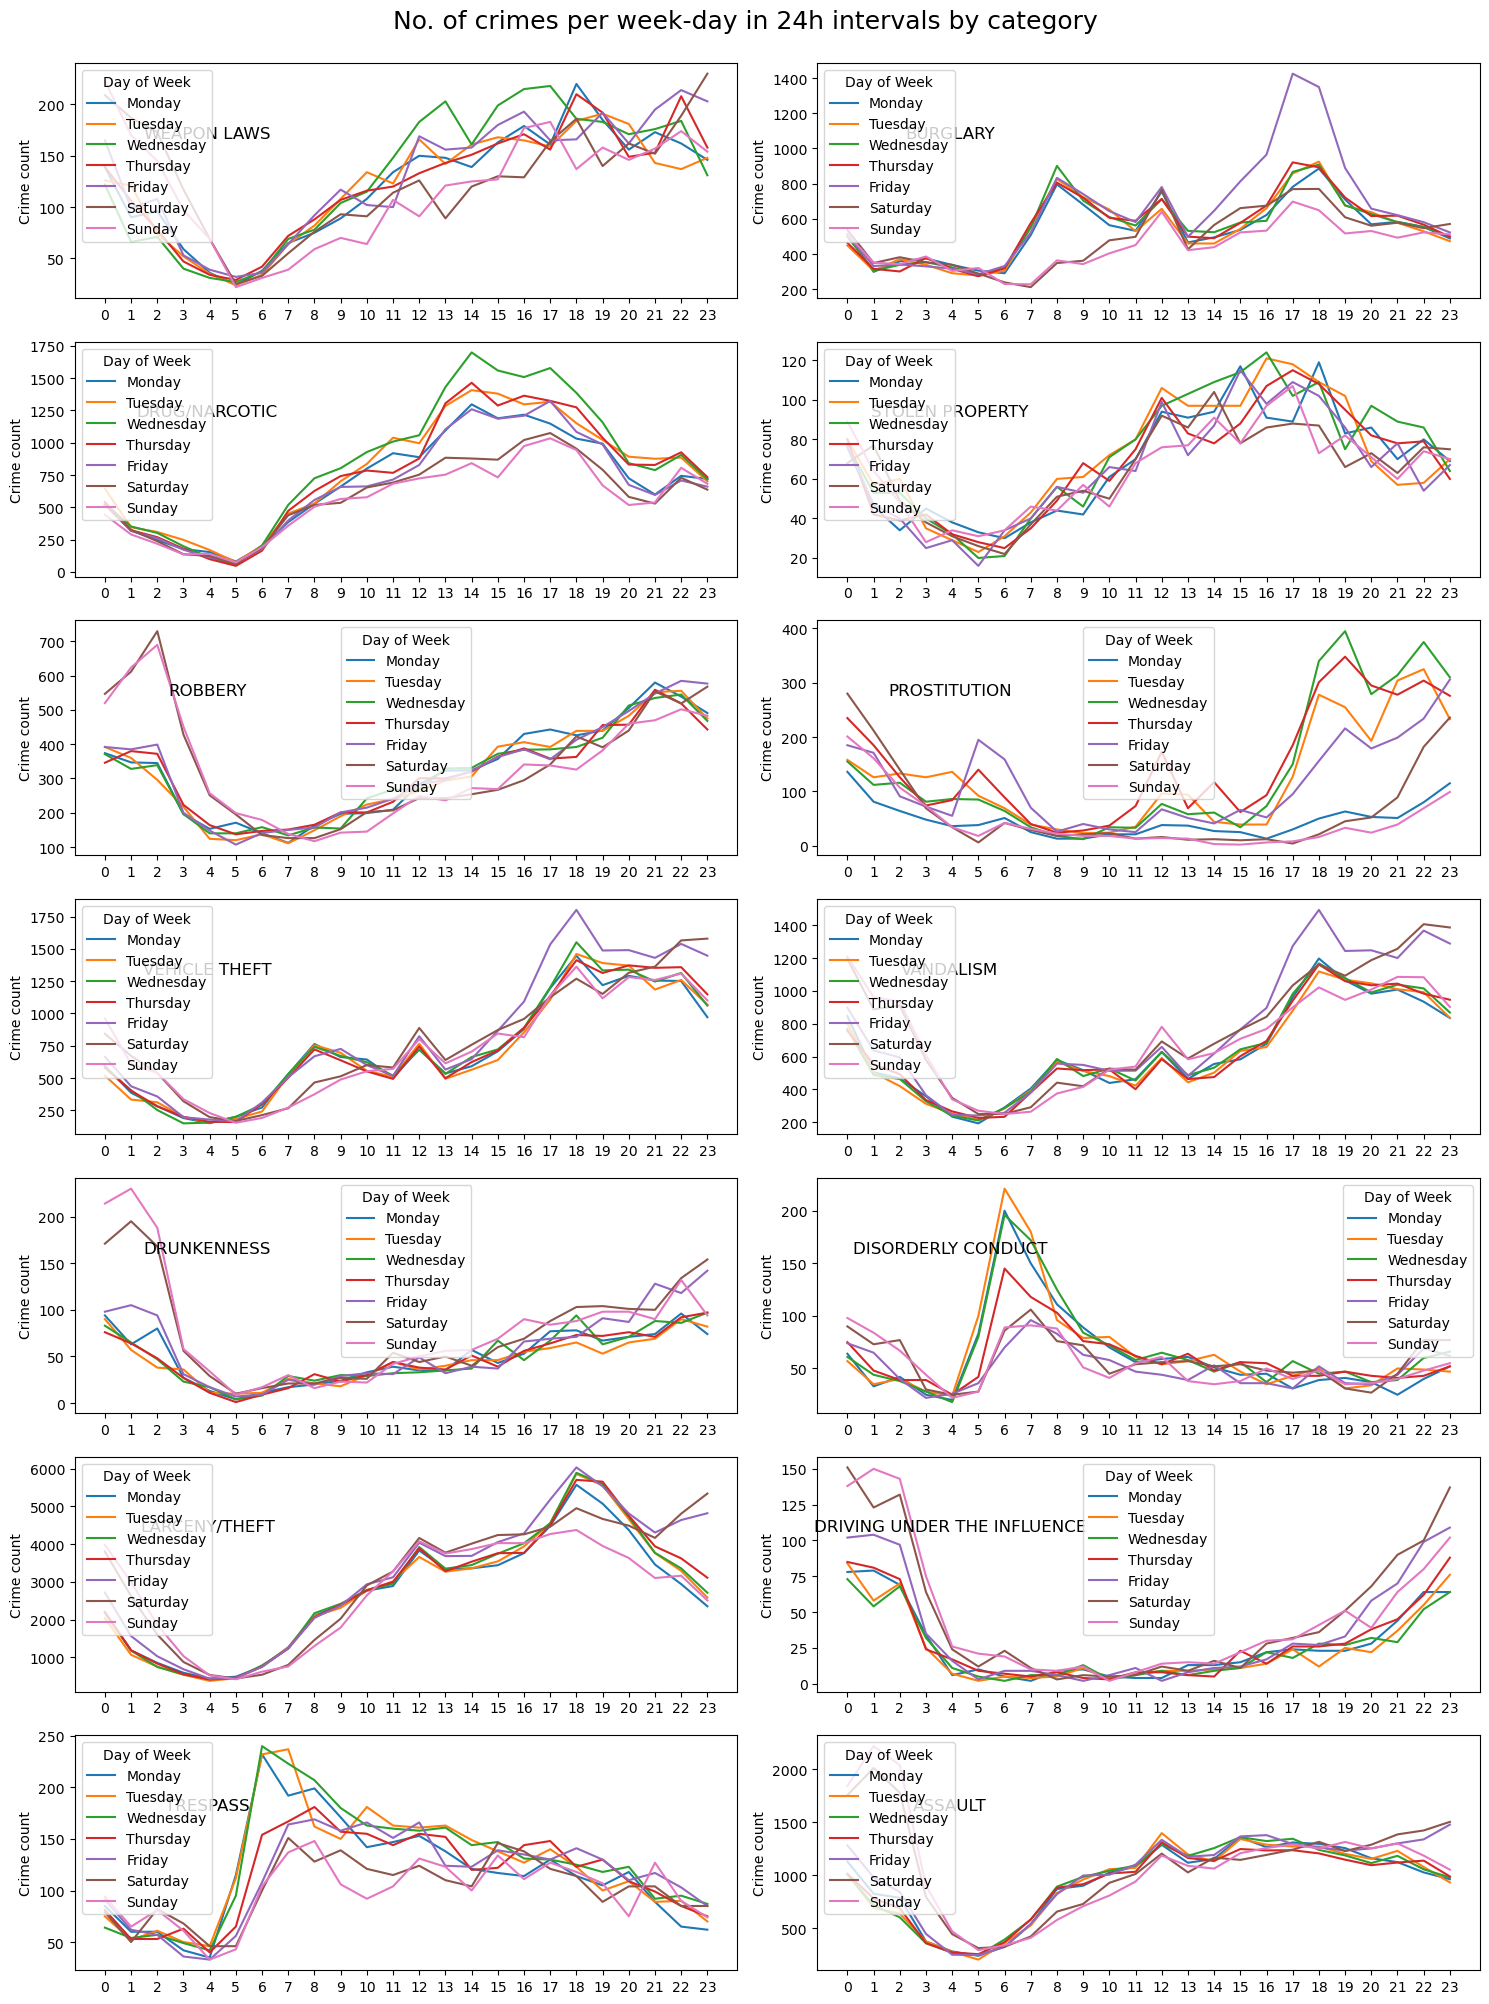

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), sharex=False)
# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

for i, crime in enumerate(focuscrimes):
    if i < len(axes):
        ax = axes[i]
        crime_data = data[data['Category'] == crime]
        grouped_crime_data = crime_data.groupby(['DayOfWeek', 'Hour']).size().reset_index(name='crime_count')
        # print(grouped_crime_data)
        for day, day_group in grouped_crime_data.groupby('DayOfWeek'):
            ax.plot(day_group['Hour'], day_group['crime_count'], label=day)
        ax.set_title(f'{crime}', y=0.8, x=0.2, pad=-20)
        ax.set_ylabel('Crime count')
        ax.set_xticks(range(24))  
        ax.set_xticklabels(range(24))
        ax.legend(title='Day of Week')
    else:
        fig.delaxes(axes[i]) 

fig.suptitle('No. of crimes per week-day in 24h intervals by category', size=18, y=1.0)
fig.tight_layout()
plt.show()

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.
>
> <font color="grey">It's OK to ask your LLM for help with creating these plots, but</font>
>
> * <font color="grey">Try on your own first,</font>
> * <font color="grey">Then use the LLM ***as a kind of TA*** to help you get your code to work.</font>
>   
> <font color="grey">So don't just ask for answers and pre-written code, then you won't learn how to code & plot in Python - especially the parts about counting the various dates. By actually doing it, you'll start to get a feel for how to slice and dice your dataset according to temporal markers - and that's a key part of data science. You'll be on your way to becoming a true *data whisperer*</font>.


**Fun little thing**: To further make the point of the exercise in Part 1, check out this video on youtube https://www.youtube.com/watch?v=DbJyPELmhJc  

# Part 3: Creating nice plots

Ok. There's a lot of barcharts today. We need them ... they are a fantastic tool for data exploration. But it can get monotonous, so let's take a little break to talk about something else before digging deeper with the barcharts.

I want to tell you a bit about how to make nice plots. I do that in the video below


[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/9hIu4pgJXQc/0.jpg)](https://www.youtube.com/watch?v=9hIu4pgJXQc)

> *Exercise:* Nice plots. <font color='grey'>Answer in your own words, do your own research, don't use your LLM.
> Once you've written down your answers, it's OK to use the LLM to get better.</font>
>
> * Create a list of 10 rules for nice plots based on the video.

# Part 4: Exploring other types of plots for temporal data

We continue our mini-break from barcharts by exploring more ways to plot temporal data.

> *Exercise:* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. <font color="grey">For this one, you may use the full power of your LLM! Yes, I'm serious. Go nuts and see if you can get these plots going by fully relying on code generated by your LLM</font>. In case you want to use the *old ways* (that's of course always OK), I've included links and tips. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.
> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.
> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).
> * Time series. Time series is a key functionality of `Pandas`, so here I simply recommend starting by searching your favorite search engine for something like `time series` `pandas`
> * Reflection (no LLM help here): What did you learn from using LLM's to simply solve everything in this exercise (in contrast to the previous ones).

**Note**: I added this exercise with fewer hints than usual. Normally, I help you break down the problems into small solvable bits. <font color="grey">Since this is a LLM exercise, I haven't done that. But I encourage you to play with figuring out the steps in solving the problem. You can ask the LLM to help you if you like (but perhaps try yourself first and compare to what the LLM suggested).</font> 

This ties in to a bigger picture thing about data science.

*My philosophy for data science is this*: Getting to what you want rarely seems hard once you found your way there, the difficulty comes in breaking down a hard problem into the little steps you need to take to solve your complex problem. In this class, I usually do the breaking down for you and provide you with the steps (that's how you go from nothing to creating complex visualizations of crime-data). But I also want you to learn the breaking-problems-down part. <font color="grey">This is one of the areas where LLMs can be of help -- they excel at breaking down problems into smaller bits -- but if you don't try yourself, you'll never get good at it. So always create your own breakdown first, then see what the computer thinks. Perhaps it can help you get better at it 😀 </font>.

*My approach is always to think*: Even if my task seems impossible, I think: "is there any problem that I ***CAN*** solve that will get me closer to where I want to go?" Once I've solved that part, I'm smarter and I try to think: "Is there a new problem I can solve that'll get me closer knowing what I know now?" And I just keep going. Usually that's enough.

*If that seems too abstract*, a useful goal for you is to use your internet searching skills (old fashioned ones) to figure out how to make each visualization work -- look for examples, tutorials, stack overflow posts, people who have found the same error messages as you, etc, etc. <font color="grey">And of course consulting your LLM</font>.

In [15]:
import pandas as pd
import calplot

# Assuming 'all_data' and 'focuscrimes' are defined
data = all_data[all_data['Category'].isin(focuscrimes)].copy()

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Create a calendar plot for each type of crime and year
# for crime in focuscrimes:
#     crime_data = data[data['Category'] == crime]
#     for year, year_group in crime_data.groupby('Year'):
#         crime_calendar = year_group.groupby('Date').size()
#         calplot.calplot(crime_calendar, suptitle=f'Crime Calendar - {crime}', cmap='YlGn')

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
path = r"C:\Users\micha\OneDrive\Pulpit\DTU\S4\02806_Social\week1\Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv"
all_data = pd.read_csv(path)

data = all_data[all_data['Category'].isin(focuscrimes)].copy()

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract hour from the 'Date' column and add a 'Hour' column
data['Hour'] = data['Date'].dt.hour

# Group data by crime category and hour
grouped_data = data.groupby(['Category', 'Hour']).size().reset_index(name='Crime_Count')

# print(grouped_data.head())


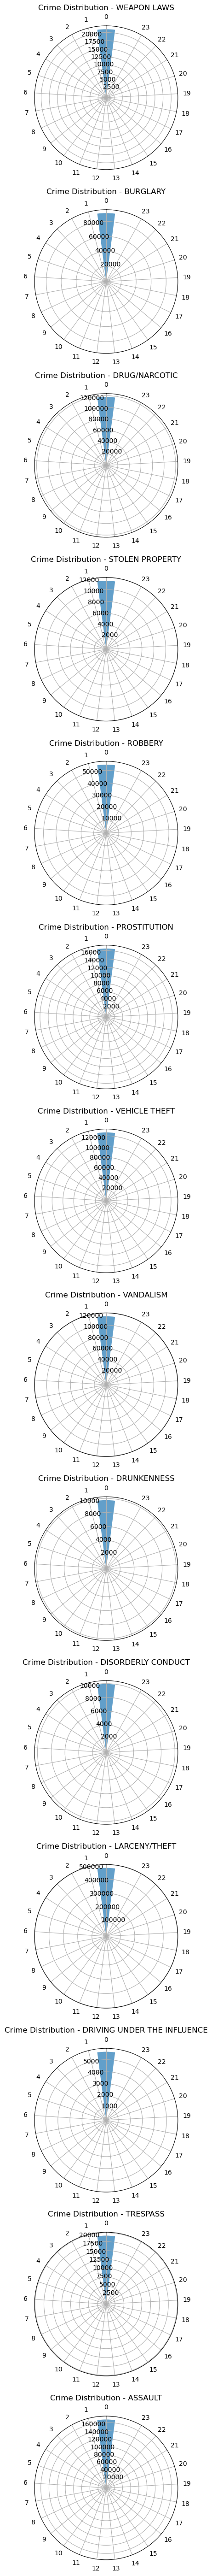

In [17]:
fig, axes = plt.subplots(nrows=len(focuscrimes), figsize=(56, 56), subplot_kw={'projection': 'polar'})
for i, crime in enumerate(focuscrimes):
    ax = axes[i]
    crime_data = grouped_data[grouped_data['Category'] == crime]
    ax.bar(crime_data['Hour'] / 24 * 2 * np.pi, crime_data['Crime_Count'], width=2 * np.pi / 24, alpha=0.7)

    ax.set_theta_zero_location('N')
    ax.set_title(f'Crime Distribution - {crime}')
    ax.set_xticks(np.linspace(0, 23, num=24, endpoint=False) * (2 * np.pi / 24))
    ax.set_xticklabels(range(24))

plt.tight_layout()
plt.show()

# Part 5: Back to visualizing patterns in the data

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco. <font color="grey">See if you can do this on your own - the calculations are fairly simple. If you get stuck, you may ask your LLM for advice, but don't use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own.</font>

> *Exercise*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia <font color="grey">(or from your LLM's description of those neighborhoods)</font>?
>    - What neighborhood would you prefer to live in? Explain why?
>    - <font color="grey">BONUS QUESTION. Can you get your LLM to discuss the graphic you created? (E.g. by showing it the image) Did it notice anything you didn't?</font>

**Comment**. Notice how much awesome data science (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? 

In [18]:
print(f"Unique SF police districts: {all_data['PdDistrict'].unique()}")

Unique SF police districts: ['INGLESIDE' 'PARK' 'SOUTHERN' 'TARAVAL' 'TENDERLOIN' 'BAYVIEW' 'CENTRAL'
 'NORTHERN' 'MISSION' 'RICHMOND' nan]


In [19]:
data_focus = all_data[all_data['Category'].isin(focuscrimes)].copy()
all_data_copy = all_data.copy()

focus_grouped_data = data_focus.groupby(['PdDistrict', 'Category']).size().reset_index(name='crime_count')
all_grouped_data = all_data_copy.groupby(['PdDistrict', 'Category']).size().reset_index(name='crime_count')

In [20]:
max_crime_row_focus_crimes = focus_grouped_data.loc[focus_grouped_data['crime_count'].idxmax()]
max_crime_row_all_data = all_grouped_data.loc[all_grouped_data['crime_count'].idxmax()]

print(f"Biggeset in FOCUS crimes :{max_crime_row_all_data['Category']}, crime:{max_crime_row_focus_crimes['Category']} value: {max_crime_row_focus_crimes['crime_count']}")
print(f"Biggeset in ALL crimes: {max_crime_row_all_data['PdDistrict']}, crime:{max_crime_row_all_data['Category']} value: {max_crime_row_all_data['crime_count']}")


Biggeset in FOCUS crimes :LARCENY/THEFT, crime:LARCENY/THEFT value: 112712
Biggeset in ALL crimes: SOUTHERN, crime:LARCENY/THEFT value: 112712


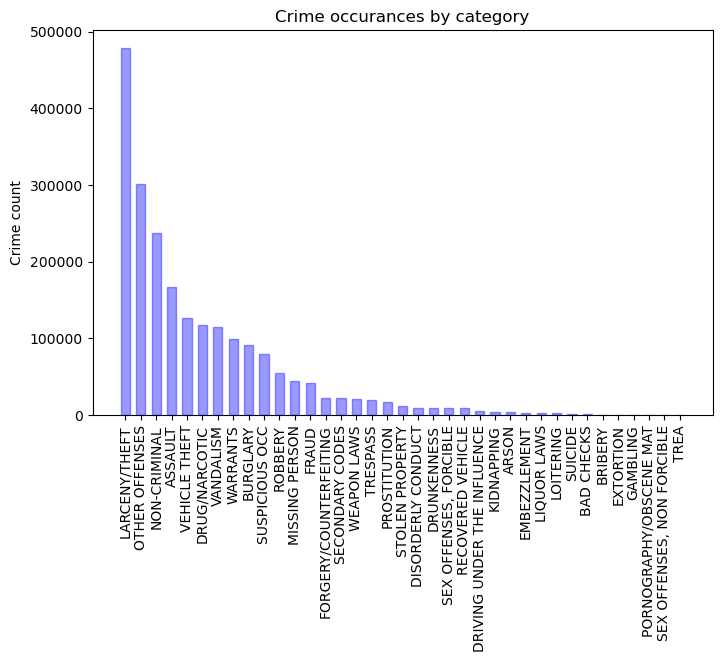

In [21]:
# Plot crimes occurence by category.
plt.figure(figsize=(8, 5))
all_data_by_category = all_data_copy.groupby(['Category']).size().reset_index(name='crime_count')
all_data_by_category = all_data_by_category.sort_values(by=['crime_count'], ascending=False)
plt.bar(all_data_by_category['Category'], all_data_by_category['crime_count'], alpha=0.4, color='blue', edgecolor='blue', linewidth=1, width=0.6)
# plt.subplots_adjust(bottom=0.3)
plt.title(f'Crime occurances by category')
plt.ylabel('Crime count')
plt.xticks(rotation=90)
fig.tight_layout()

In [22]:
# Normalize the data P(crime)
total_no_crimes = all_data_by_category['crime_count'].sum()

all_data_by_category['normalized_crime_count'] = all_data_by_category['crime_count'] / total_no_crimes
print(all_data_by_category.head())

          Category  crime_count  normalized_crime_count
15   LARCENY/THEFT       477975                0.224451
20  OTHER OFFENSES       301874                0.141756
19    NON-CRIMINAL       236928                0.111259
1          ASSAULT       167042                0.078441
34   VEHICLE THEFT       126228                0.059275


In [23]:
# Calculate that same probability distribution but for each PD district, let's call that P(crime|district).
# data groupped by disctrict and category
crime_counts_by_district = all_data_copy.groupby(['PdDistrict', 'Category']).size().reset_index(name='crime_count')
# print(crime_counts_by_district.head())

total_crimes_by_district = all_data_copy.groupby('PdDistrict').size().reset_index(name='crime_count_total')
# print(total_crimes_by_district.head())

# Merge the total crime counts by district with the crime counts by district DataFrame
crime_counts_by_district = crime_counts_by_district.merge(total_crimes_by_district, on='PdDistrict')
# print(crime_counts_by_district.head())

# calculate the conditional probability of each crime within each polic district
crime_counts_by_district['P(crime|district)'] = crime_counts_by_district['crime_count'] / crime_counts_by_district['crime_count_total']
crime_counts_by_district.head()

,PdDistrict,Category,crime_count,crime_count_total,P(crime|district)
0,BAYVIEW,ARSON,990,205480,0.004818
1,BAYVIEW,ASSAULT,20016,205480,0.097411
2,BAYVIEW,BAD CHECKS,73,205480,0.000355
3,BAYVIEW,BRIBERY,156,205480,0.000759
4,BAYVIEW,BURGLARY,9606,205480,0.046749


In [29]:
# Now we look at the ratio P(crime|district)/P(crime)
pd.set_option('expand_frame_repr', False)

total_crime_counts = all_data_copy.groupby('Category').size()
overall_probabilities = total_crime_counts / total_crime_counts.sum()
# print(overall_probabilities.head())

# Reset the index of overall_probabilities DataFrame
overall_probabilities = overall_probabilities.reset_index()
# print(overall_probabilities.head())

#rename the 2nd column
overall_probabilities = overall_probabilities.rename(columns={overall_probabilities.columns[1]: 'P(crime)'})
# print(overall_probabilities.head())

if 'P(crime)' not in crime_counts_by_district.columns:
    crime_counts_by_district = crime_counts_by_district.merge(overall_probabilities, on='Category')
# crime_counts_by_district.head()
    
crime_counts_by_district['ratio'] = crime_counts_by_district['P(crime|district)'] / crime_counts_by_district['P(crime)']    
crime_counts_by_district.head()

,PdDistrict,Category,crime_count,crime_count_total,P(crime|district),P(crime),ratio
0,BAYVIEW,ARSON,990,205480,0.004818,0.00182,2.647748
1,CENTRAL,ARSON,275,221923,0.001239,0.00182,0.680991
2,INGLESIDE,ARSON,451,181092,0.002490,0.00182,1.368637
3,MISSION,ARSON,430,288985,0.001488,0.00182,0.817719
4,NORTHERN,ARSON,381,266435,0.001430,0.00182,0.785859


C:\Users\micha\AppData\Local\Temp\ipykernel_7204\2653930781.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(district_data['Category'], rotation=90)


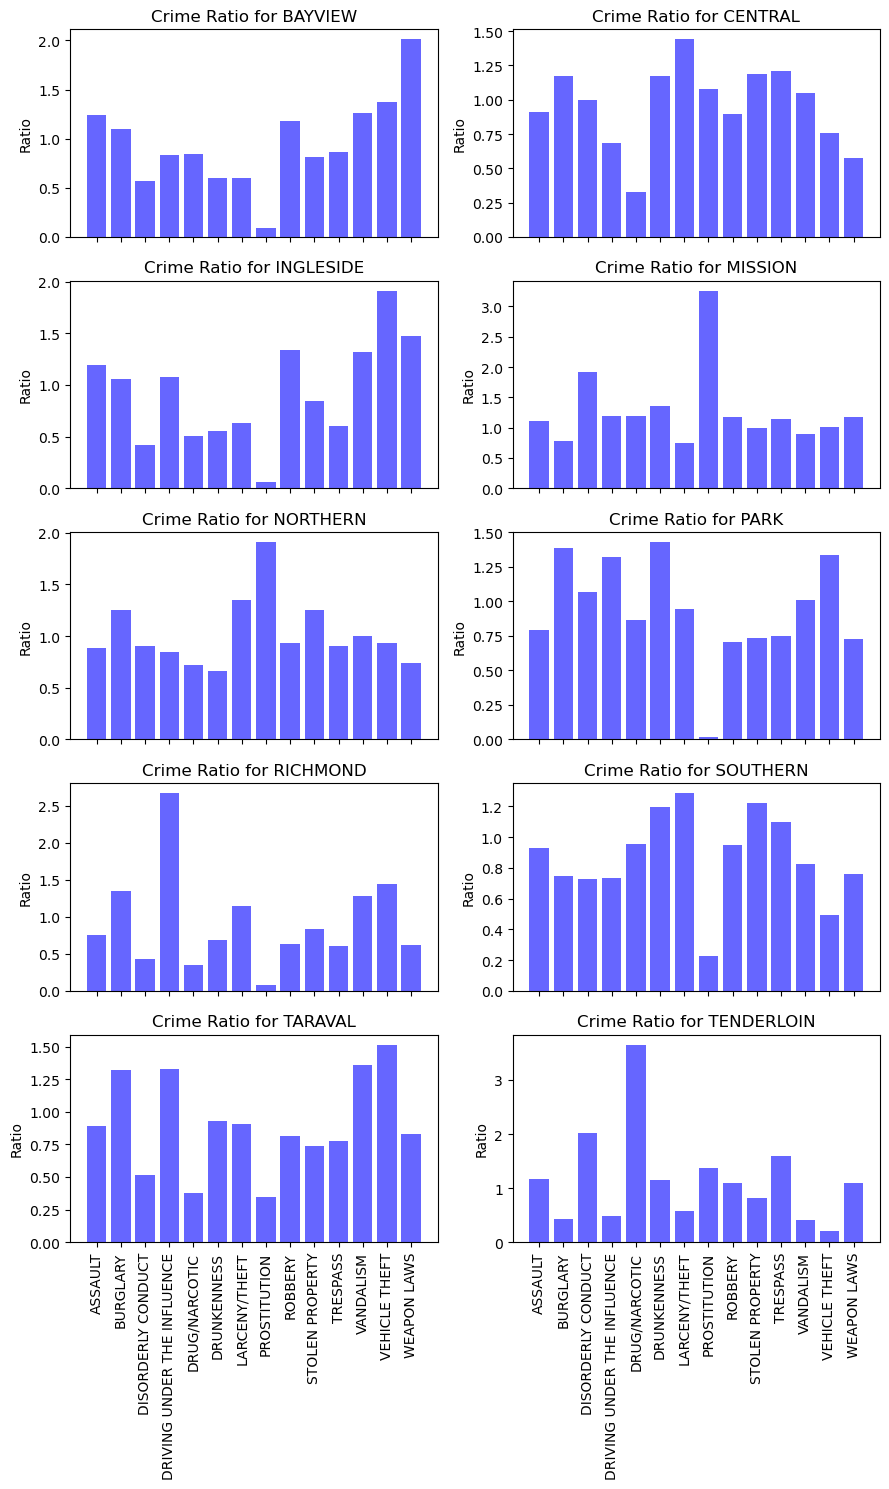

In [30]:
# get the focus crimes:
crime_counts_by_district_focus = crime_counts_by_district[crime_counts_by_district['Category'].isin(focuscrimes)]

districts = crime_counts_by_district_focus['PdDistrict'].unique()

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(9, 15), sharex=True)
axes = axes.flatten()  

# Plot each district's bar graph
for i, district in enumerate(districts):
    # Select data for the current district
    district_data = crime_counts_by_district_focus[crime_counts_by_district_focus['PdDistrict'] == district]
    
    # Plot the bar graph
    ax = axes[i]
    ax.bar(district_data['Category'], district_data['ratio'], color='blue', alpha=0.6)
    
    # Set labels and title
    ax.set_title(f'Crime Ratio for {district}')
    ax.set_ylabel('Ratio')
    ax.set_xticklabels(district_data['Category'], rotation=90)

plt.tight_layout()
plt.show()